Loading the dataset

In [ ]:
import numpy as np
import pandas as pd
#Kaggle dataset : https://www.kaggle.com/datasets/usgs/earthquake-database
data = pd.read_csv("database.csv")
data.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [ ]:
data = data.loc[data["Type"]=="Earthquake"] #Selecting only the rows containing column 'Type' of value 'Earthquake'

In [ ]:
data.shape

(23232, 21)

In [ ]:
#Checking for duplicated values in the rows of the dataset
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
23407    False
23408    False
23409    False
23410    False
23411    False
Length: 23232, dtype: bool

In [ ]:
#Checking the information of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23232 entries, 0 to 23411
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        23232 non-null  object 
 1   Time                        23232 non-null  object 
 2   Latitude                    23232 non-null  float64
 3   Longitude                   23232 non-null  float64
 4   Type                        23232 non-null  object 
 5   Depth                       23232 non-null  float64
 6   Depth Error                 4449 non-null   float64
 7   Depth Seismic Stations      7084 non-null   float64
 8   Magnitude                   23232 non-null  float64
 9   Magnitude Type              23229 non-null  object 
 10  Magnitude Error             315 non-null    float64
 11  Magnitude Seismic Stations  2460 non-null   float64
 12  Azimuthal Gap               7286 non-null   float64
 13  Horizontal Distance         159

In [ ]:
#Description about the dataset
data.describe()

,Latitude,Longitude,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Error,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square
count,23232.000000,23232.000000,23232.000000,4449.000000,7084.000000,23232.000000,315.000000,2460.000000,7286.000000,1595.000000,1144.000000,17247.000000
mean,1.386383,39.746049,71.313913,4.921323,275.796302,5.882763,0.066197,47.608943,43.807400,4.006932,6.704676,1.023518
std,29.929060,125.751903,122.968384,4.681354,161.961894,0.424032,0.039592,63.127239,30.947508,5.389051,4.629406,0.186946
min,-77.080000,-179.997000,-1.100000,0.000000,0.000000,5.500000,0.000000,0.000000,0.000000,0.004505,0.085000,0.000000
25%,-18.719500,-76.366500,15.000000,1.800000,147.000000,5.600000,0.046000,9.750000,24.100000,0.963300,5.300000,0.900000
50%,-3.680000,106.349000,33.000000,3.500000,255.000000,5.700000,0.058000,28.000000,36.000000,2.332000,6.700000,1.000000
75%,24.968500,145.290250,54.800000,6.200000,384.000000,6.000000,0.073000,62.000000,53.775000,4.730000,8.000000,1.130000
max,86.005000,179.998000,700.000000,91.295000,934.000000,9.100000,0.350000,821.000000,360.000000,37.874000,99.000000,3.220000


In [ ]:
#printing the columns present in our dataset
print(data.columns)

Index(['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Depth Error',
       'Depth Seismic Stations', 'Magnitude', 'Magnitude Type',
       'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap',
       'Horizontal Distance', 'Horizontal Error', 'Root Mean Square', 'ID',
       'Source', 'Location Source', 'Magnitude Source', 'Status'],
      dtype='object')


Data Preprocessing

In [ ]:
#Printing the numerical and categorical features
# Categorical columns
cat_col = [col for col in data.columns if data[col].dtype == 'object']
print('Categorical columns :',cat_col)
# Numerical columns
num_col = [col for col in data.columns if data[col].dtype != 'object']
print('Numerical columns :',num_col)

Categorical columns : ['Date', 'Time', 'Type', 'Magnitude Type', 'ID', 'Source', 'Location Source', 'Magnitude Source', 'Status']
Numerical columns : ['Latitude', 'Longitude', 'Depth', 'Depth Error', 'Depth Seismic Stations', 'Magnitude', 'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap', 'Horizontal Distance', 'Horizontal Error', 'Root Mean Square']


In [ ]:
#Checking number of unique values in numerical columns
data[num_col].nunique()

Latitude                      20534
Longitude                     21312
Depth                          3482
Depth Error                     297
Depth Seismic Stations          736
Magnitude                        60
Magnitude Error                  90
Magnitude Seismic Stations      241
Azimuthal Gap                  1105
Horizontal Distance            1441
Horizontal Error                186
Root Mean Square                187
dtype: int64

In [ ]:
#Checking number of unique values in categorical columns
data[cat_col].nunique()

Date                12339
Time                20351
Type                    1
Magnitude Type         10
ID                  23232
Source                 13
Location Source        48
Magnitude Source       24
Status                  2
dtype: int64

In [ ]:
#Finding number of missing values in each column
print(data.isnull().sum())

Date                              0
Time                              0
Latitude                          0
Longitude                         0
Type                              0
Depth                             0
Depth Error                   18783
Depth Seismic Stations        16148
Magnitude                         0
Magnitude Type                    3
Magnitude Error               22917
Magnitude Seismic Stations    20772
Azimuthal Gap                 15946
Horizontal Distance           21637
Horizontal Error              22088
Root Mean Square               5985
ID                                0
Source                            0
Location Source                   0
Magnitude Source                  0
Status                            0
dtype: int64


In [ ]:
#Finding the percentage of missing values in each column
miss_percent = (data.isnull().sum()/data.shape[0])*100
print(round(miss_percent,2))

Date                           0.00
Time                           0.00
Latitude                       0.00
Longitude                      0.00
Type                           0.00
Depth                          0.00
Depth Error                   80.85
Depth Seismic Stations        69.51
Magnitude                      0.00
Magnitude Type                 0.01
Magnitude Error               98.64
Magnitude Seismic Stations    89.41
Azimuthal Gap                 68.64
Horizontal Distance           93.13
Horizontal Error              95.08
Root Mean Square              25.76
ID                             0.00
Source                         0.00
Location Source                0.00
Magnitude Source               0.00
Status                         0.00
dtype: float64


In [ ]:
#Checking the number of instances in each class of the type attribute
data['Type'].value_counts()

Earthquake    23232
Name: Type, dtype: int64

In [ ]:
data.drop(['Type', 'Depth Error',
       'Depth Seismic Stations','Magnitude Type',
       'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap',
       'Horizontal Distance', 'Horizontal Error', 'Root Mean Square', 'ID',
       'Source', 'Location Source', 'Magnitude Source', 'Status'],axis=1,inplace=True)

<ipython-input-114-19df07000423>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['Type', 'Depth Error',


In [ ]:
data.shape

(23232, 6)

In [ ]:
data.columns

Index(['Date', 'Time', 'Latitude', 'Longitude', 'Depth', 'Magnitude'], dtype='object')

In [ ]:
import datetime
import time

timestamp = []
for d, t in zip(data['Date'], data['Time']):
    try:
        ts = datetime.datetime.strptime(d+' '+t, '%m/%d/%Y %H:%M:%S')
        timestamp.append(time.mktime(ts.timetuple()))
    except ValueError:
        timestamp.append('ValueError')
timeStamp = pd.Series(timestamp)
data['Timestamp'] = timeStamp.values

<ipython-input-117-1e921b024c8c>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Timestamp'] = timeStamp.values


In [ ]:
data.drop(['Date', 'Time'], axis=1,inplace=True)
data = data[data.Timestamp != 'ValueError']
print(data.head(5))
data.dropna(inplace=True)

   Latitude  Longitude  Depth  Magnitude    Timestamp
0    19.246    145.616  131.6        6.0 -157630542.0
1     1.863    127.352   80.0        5.8 -157465811.0
2   -20.579   -173.972   20.0        6.2 -157355642.0
3   -59.076    -23.557   15.0        5.8 -157093817.0
4    11.938    126.427   15.0        5.8 -157026430.0


<ipython-input-118-dbf982ec52f5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['Date', 'Time'], axis=1,inplace=True)
<ipython-input-118-dbf982ec52f5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [ ]:
data.loc[data["Magnitude"] > 7, "Magnitude"] = 1
data.loc[data["Magnitude"] < 7, "Magnitude"] = 0
data['Magnitude']=data['Magnitude'].astype("int64")

In [ ]:
data['Magnitude'].value_counts()

0    23061
7      168
Name: Magnitude, dtype: int64

Data Visualization

In [ ]:
!pip install basemap

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import seaborn as sns
sns.set(style="darkgrid")

In [ ]:
#Printing the maximum and minimum earthquake magnitudes
print("Min magnitude value is "+ str(data['Magnitude'].min()))
print("Max magnitude value is "+ str(data['Magnitude'].max()))

Min magnitude value is 5.5
Max magnitude value is 9.1


Text(0, 0.5, 'Number of Occurrences')

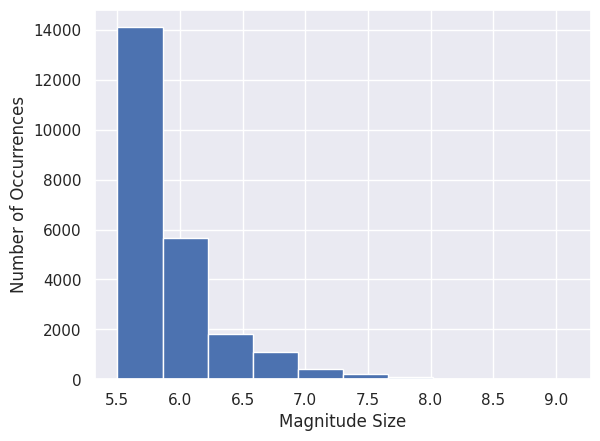

In [ ]:
plt.hist(data['Magnitude'])
plt.xlabel('Magnitude Size')
plt.ylabel('Number of Occurrences')

In [ ]:
data.columns

Index(['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Depth Error',
       'Depth Seismic Stations', 'Magnitude', 'Magnitude Type',
       'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap',
       'Horizontal Distance', 'Horizontal Error', 'Root Mean Square', 'ID',
       'Source', 'Location Source', 'Magnitude Source', 'Status'],
      dtype='object')

In [ ]:
#Earthquakes with magnitude greater than 7
G8 = data[data['Magnitude']>7]
G8['Location Source'].value_counts()

US        467
ISCGEM     92
CI          3
H           1
AG          1
SPE         1
AGS         1
NC          1
AEIC        1
WEL         1
GUC         1
Name: Location Source, dtype: int64

Text(0.5, 1.0, 'Magnitude Type Vs. Frequency')

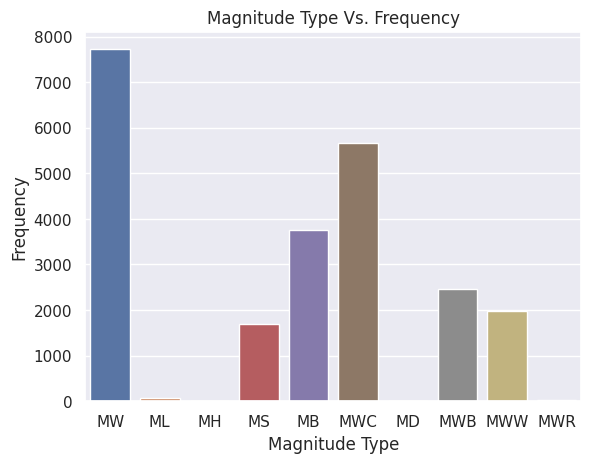

In [ ]:
sns.countplot(x="Magnitude Type",data = data)
plt.ylabel("Frequency")
plt.title("Magnitude Type Vs. Frequency")

Visualization on World Map

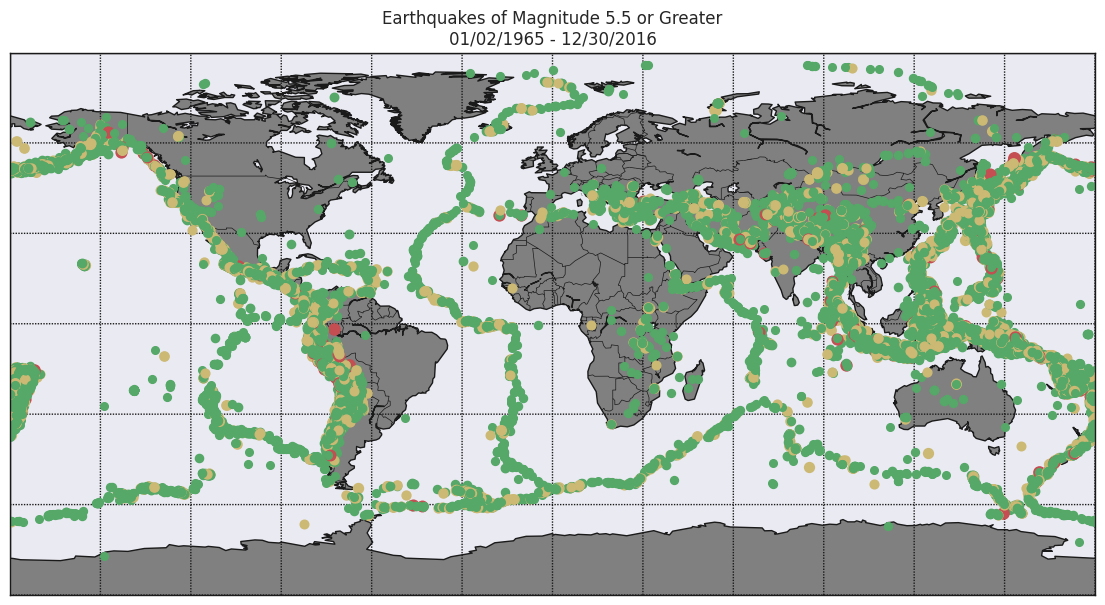

In [ ]:
def get_marker_color(magnitude):
    if magnitude < 6.2:
        return ('go')
    elif magnitude < 7.5:
        return ('yo')
    else:
        return ('ro')

plt.figure(figsize=(14,10),edgecolor='w')

map = Basemap(projection='cyl', llcrnrlat=-90, urcrnrlat=90,
            llcrnrlon=-180, urcrnrlon=180,)
map.drawcoastlines()
map.drawcountries()
map.fillcontinents(color = 'gray')
map.drawmapboundary()
map.drawmeridians(np.arange(0, 360, 30))
map.drawparallels(np.arange(-90, 90, 30))

# Reading the longitude, latitude and magnitude values from the dataset
lons = data['Longitude'].values
lats = data['Latitude'].values
magnitudes = data['Magnitude'].values
timestrings = data['Date'].tolist()

min_marker_size = 0.5
for lon, lat, mag in zip(lons, lats, magnitudes):
    x,y = map(lon, lat)
    msize = mag
    marker_string = get_marker_color(mag)
    map.plot(x, y, marker_string, markersize=msize)

title_string = "Earthquakes of Magnitude 5.5 or Greater\n"
title_string += "%s - %s" % (timestrings[0][:10], timestrings[-1][:10])
plt.title(title_string)

plt.show()

Counplot showing number of earthquake occurences in each year since 1960s

Text(0.5, 1.0, 'Number of Earthquakes In Each Year')

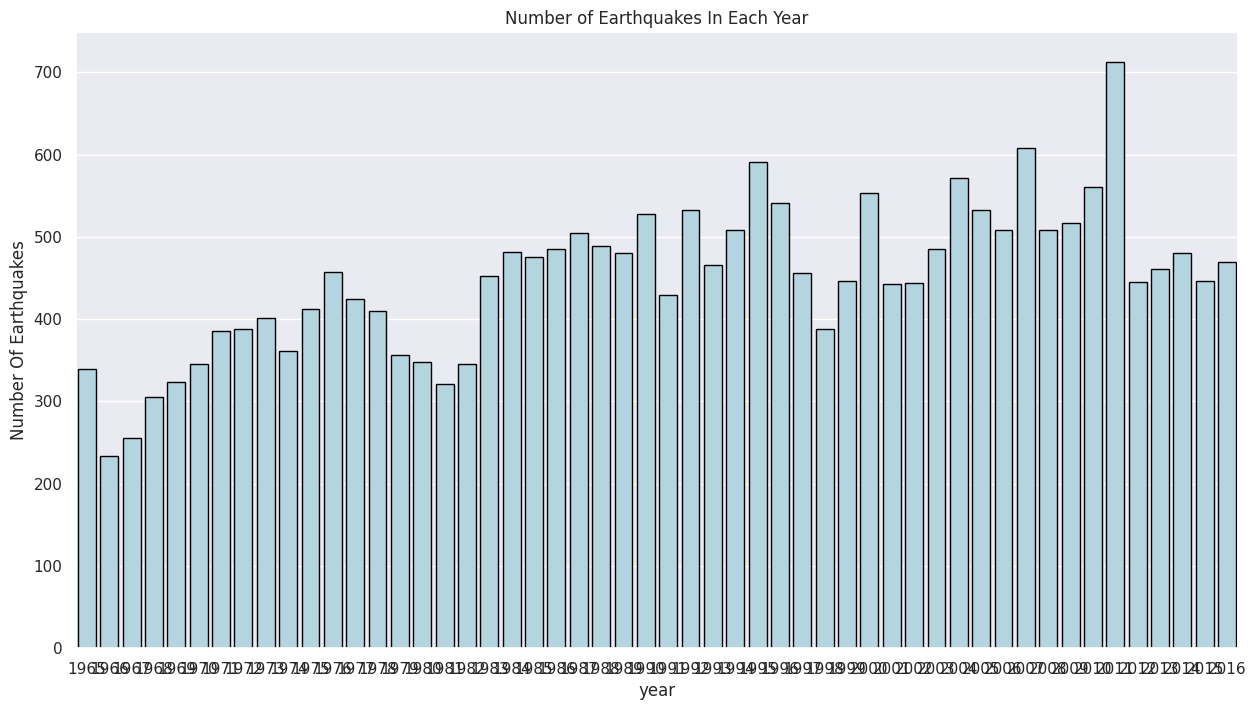

In [ ]:
data['date'] = data['Date'].apply(lambda x: pd.to_datetime(x))
data['year'] = data['date'].apply(lambda x: str(x).split('-')[0])
plt.figure(figsize=(15, 8))
sns.set(font_scale=1.0)
sns.countplot(x="year", data=data,color="lightblue",edgecolor="black")
plt.ylabel('Number Of Earthquakes')
plt.title('Number of Earthquakes In Each Year')

Logistic Regression Model

In [ ]:
import sklearn
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
x = data[['Latitude', 'Longitude', 'Timestamp']]
y = data[['Magnitude']]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)
print(x_train.shape,x_test.shape)

(17421, 3) (5808, 3)


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)
log=LogisticRegression()
model=log.fit(x_train,y_train)
y_pred=log.predict(x_test)
print("Accuracy is:",(metrics.accuracy_score(y_test,y_pred))*100)

Accuracy is: 93.01190988664084


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Neural Network Model

In [ ]:
import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
print(x_train.shape, x_test.shape, y_train.shape, x_test.shape)
from keras.models import Sequential
from keras.layers import Dense

# 3 dense layers, 16, 16, 2 nodes each

def create_model(neurons, activation, optimizer, loss):
    model = Sequential()
    model.add(Dense(neurons, activation=activation, input_shape=(3,)))
    model.add(Dense(neurons, activation=activation))
    model.add(Dense(2, activation='softmax'))

    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

    return model
from keras.wrappers.scikit_learn import KerasClassifier

model = KerasClassifier(build_fn=create_model, verbose=0)

param_grid = {
    "neurons": [16, 64],
    "batch_size": [10, 20],
    "epochs": [10],
    "activation": ['sigmoid', 'relu'],
    "optimizer": ['SGD', 'Adadelta'],
    "loss": ['squared_hinge']
}


(16260, 3) (6969, 3) (16260, 1) (6969, 3)


<ipython-input-137-ce1cf28aee96>:22: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, verbose=0)


In [ ]:
x_train = np.asarray(x_train).astype(np.float32)
y_train = np.asarray(y_train).astype(np.float32)
x_test = np.asarray(x_test).astype(np.float32)
y_test = np.asarray(y_test).astype(np.float32)

GridSearchCV is used for finding the best parameters for tuning the model's performance

In [ ]:
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
grid_result = grid.fit(x_train, y_train)

best_params = grid_result.best_params_
best_params

{'activation': 'relu',
 'batch_size': 10,
 'epochs': 10,
 'loss': 'squared_hinge',
 'neurons': 16,
 'optimizer': 'SGD'}

In [ ]:
model = Sequential()
model.add(Dense(16, activation=best_params['activation'], input_shape=(3,)))
model.add(Dense(16, activation=best_params['activation']))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer=best_params['optimizer'], loss=best_params['loss'], metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=best_params['batch_size'], epochs=best_params['epochs'], verbose=1, validation_data=(x_test, y_test))

[test_loss, test_acc] = model.evaluate(x_test, y_test)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

Epoch 1/10
1626/1626 [==============================] - 16s 9ms/step - loss: nan - accuracy: 0.9900 - val_loss: nan - val_accuracy: 0.9918
Epoch 2/10
1626/1626 [==============================] - 5s 3ms/step - loss: nan - accuracy: 0.9932 - val_loss: nan - val_accuracy: 0.9918
Epoch 3/10
1626/1626 [==============================] - 5s 3ms/step - loss: nan - accuracy: 0.9932 - val_loss: nan - val_accuracy: 0.9918
Epoch 4/10
1626/1626 [==============================] - 8s 5ms/step - loss: nan - accuracy: 0.9932 - val_loss: nan - val_accuracy: 0.9918
Epoch 5/10
1626/1626 [==============================] - 4s 3ms/step - loss: nan - accuracy: 0.9932 - val_loss: nan - val_accuracy: 0.9918
Epoch 6/10
1626/1626 [==============================] - 5s 3ms/step - loss: nan - accuracy: 0.9932 - val_loss: nan - val_accuracy: 0.9918
Epoch 7/10
1626/1626 [==============================] - 6s 4ms/step - loss: nan - accuracy: 0.9932 - val_loss: nan - val_accuracy: 0.9918
Epoch 8/10
1626/1626 [===========